This notebook generates UMAP plots for the organoid dataset

In [16]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
#

In [17]:
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()
    
    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }
    
    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }
    
    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")

Git root directory: /home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline 


In [18]:
figures_path <- file.path(root_dir,"5.EDA/figures/")
if (!dir.exists(figures_path)) {
  dir.create(figures_path, recursive = TRUE)
}

## Plotting UMAPs for organoid dataset

- Organoid features
- Single cell features
- Single cell features with parent organoid labels


In [19]:
# output paths
organoid_features_path <- file.path(figures_path, "umap_organoid_features.png")
single_cell_features_path <- file.path(figures_path, "umap_single_cell_features.png")
single_cell_features_annotated_path <- file.path(figures_path, "umap_single_cell_w_parent_organoid_labels.png")

In [20]:
umap_results <- arrow::read_parquet(file.path(root_dir,"5.EDA/results/organoid_fs_umap.parquet"))
head(umap_results)

patient object_id unit dose treatment     image_set Well single_cell_count
1 NF0014  40        uM   10   Mirdametinib  G8-1      G8   8                
2 NF0014  24        uM    1   Fimepinostat  D5-1      D5   5                
3 NF0014  85        uM    1   Mirdametinib  F8-1      F8   9                
4 NF0014  18        nM   10   Staurosporine G11-1     G11  1                
5 NF0014  24        uM    1   Binimetinib   G7-1      G7   7                
6 NF0014  30        uM    1   Copanlisib    E3-2      E3   9                
  Target              Class          Therapeutic Categories UMAP1      UMAP2   
1 MEK1/2 inhibitor    Small Molecule Kinase Inhibitor       -1.2527590 6.106524
2 PI3K and HDAC       Small Molecule Investigational        -0.2551139 2.851046
3 MEK1/2 inhibitor    Small Molecule Kinase Inhibitor        2.8916833 2.332242
4 Apoptosis induction Small Molecule Experimental           -1.3627120 6.070857
5 MEK1/2 inhibitor    Small Molecule Kinase Inhibitor       -1.5257740 6.772458
6 PI3K inhibitor      Small Molecule Kinase Inhibitor       -0.7871740 5.977594

### Color mapping for MOAs

In [23]:

print(length(unique(umap_results$Target)))
unique(umap_results$Target)


[1] 16


[1] "MEK1/2 inhibitor"                   "PI3K and HDAC"                     
 [3] "Apoptosis induction"                "PI3K inhibitor"                    
 [5] "MEK1/MEK1/2 inhibitor2"             "receptor tyrosine kinase inhibitor"
 [7] "HSP90 inhibitor"                    "Control"                           
 [9] "mTOR inhibtor"                      "tyrosine kinase inhibitor"         
[11] "IGF-1R inhibitor"                   "Na+/K+ pump inhibitor"             
[13] "histamine H1 receptor antagonist"   "DNA binding"                       
[15] "BR4 inhibitor"                      "HDAC inhibitor"

In [ ]:
# set custom colors for each MOA
custom_MOA_palette <- c(
    'Control' = "#5a5c5d",
    'MEK1/2 inhibitor; MEK1/2' = "#882E8B",
    'Apoptosis induction'="#D700E0",
    'PI3K and HDAC inhibitor' = "#2E6B8B",
    'PI3K inhibitor'="#0092E0",
    'receptor tyrosine kinase inhibitor'="#ECCC69",
    'tyrosine kinase inhibitor'="#E0A800",
    'HSP90 inhibitor'="#E07E00",
    'mTOR inhibtor'="#ACE089",
    'IGF-1R inhibitor' = "#243036",
    'Na+/K+ pump inhibitor' = "#A16C28",
    'histamine H1 receptor antagonist' = "#3A8F00"
    'DNA binding' = "#A0A0A0",
    'BRD4 inhibitor' = "#A0A0A0",
    'HDAC inhibitor' = "#A0A0A0",
)
    

### Organoid features

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


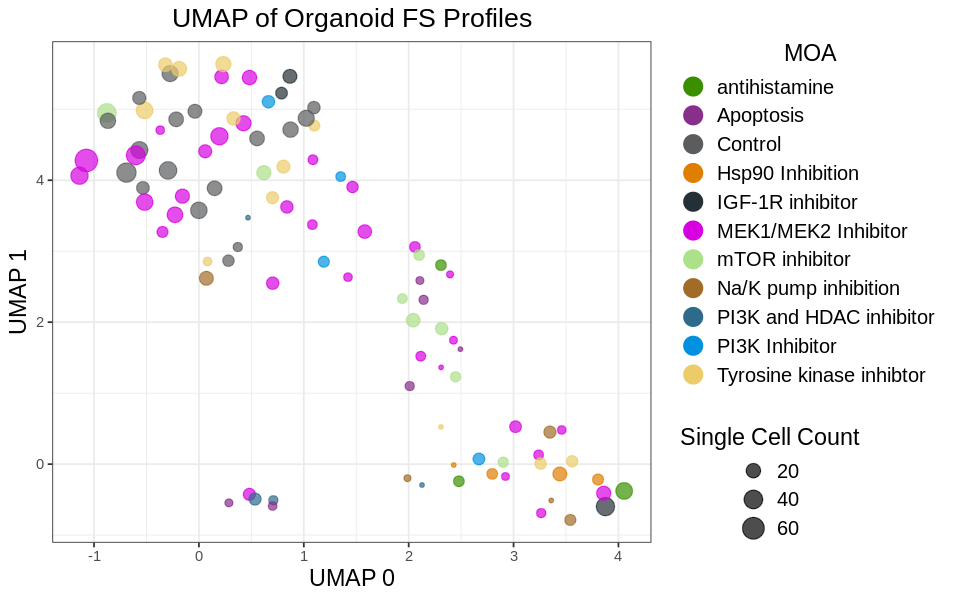

In [6]:
width <- 8
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_organoid_plot <- (
    ggplot(umap_results, aes(x = UMAP1, y = UMAP2, color = MOA, size = single_cell_count))
    + geom_point(alpha = 0.7)
    + scale_color_manual(values = custom_MOA_palette)
    + labs(title = "UMAP of Organoid FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        size = guide_legend(
            title = "Single Cell Count",
            text = element_text(size = 16, hjust = 0.5)
            
            ),
        color = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5)
        )
    )
)
ggsave(umap_organoid_plot, file = organoid_features_path, width = width, height = height, dpi = 300)
umap_organoid_plot

### Single cell features

patient object_id unit dose treatment    image_set Well parent_organoid
1 NF0014   70       uM   10   Mirdametinib G8-1      G8   40             
2 NF0014  122       uM   10   Mirdametinib G8-1      G8   40             
3 NF0014  162       uM   10   Mirdametinib G8-1      G8   40             
4 NF0014  165       uM   10   Mirdametinib G8-1      G8   40             
5 NF0014  182       uM   10   Mirdametinib G8-1      G8   40             
6 NF0014  220       uM   10   Mirdametinib G8-1      G8   40             
  MOA                 UMAP1    UMAP2   
1 MEK1/MEK2 Inhibitor 3.803937 7.678593
2 MEK1/MEK2 Inhibitor 3.805405 7.645585
3 MEK1/MEK2 Inhibitor 3.753702 7.637684
4 MEK1/MEK2 Inhibitor 3.830318 7.654173
5 MEK1/MEK2 Inhibitor 3.806508 7.670638
6 MEK1/MEK2 Inhibitor 3.817652 7.597888

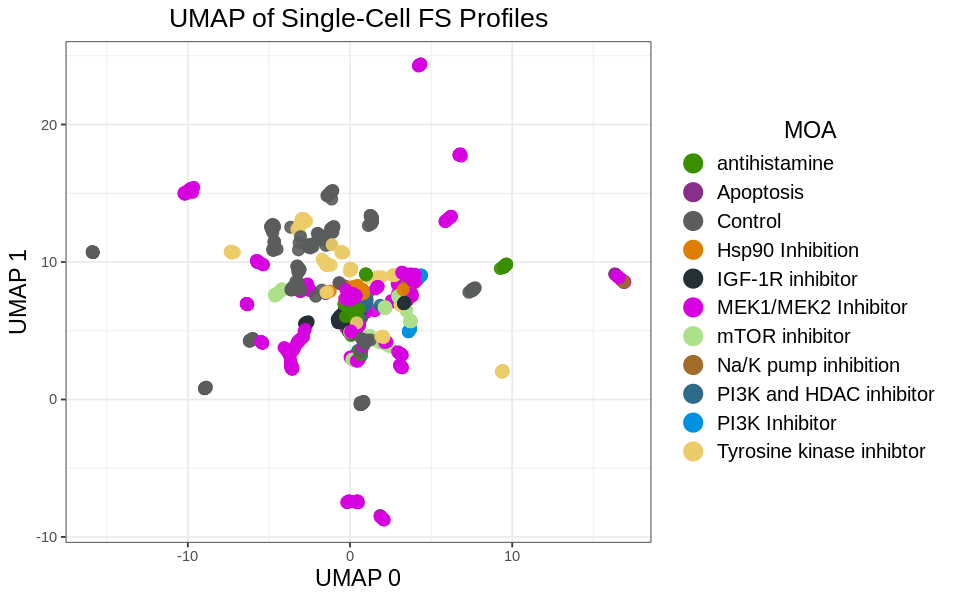

In [7]:
umap_sc_results <- arrow::read_parquet('../results/NF0014/3.sc_fs_profiles_umap.parquet')
head(umap_sc_results)
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = MOA))
    + geom_point(size = 3, alpha = 0.9)
    + scale_color_manual(values = custom_MOA_palette)
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        color = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5),
            override.aes = list(alpha = 1,size = 5)
        )
    )
)
ggsave(umap_sc_plot, file = single_cell_features_path, width = width, height = height, dpi = 300)

umap_sc_plot


### Single cell features with parent organoid labels

In [8]:
umap_sc_results$unique_parent_organoid <- paste(
    umap_sc_results$image_set, 
    umap_sc_results$parent_organoid, 
    sep = "_"
)
# give a numerical label to each unique parent organoid
umap_sc_results$parent_organoid_label <- as.numeric(factor(umap_sc_results$unique_parent_organoid))

In [9]:
# custom color palette - continuous
custom_palette <- colorRampPalette(c("blue", "green", "yellow"))
custom_colors <- custom_palette(length(unique(umap_sc_results$parent_organoid_label)))
# make the scale continuous
custom_colors <- circlize::colorRamp2(seq(0, 1, length.out = length(unique(umap_sc_results$parent_organoid_label))), custom_colors)

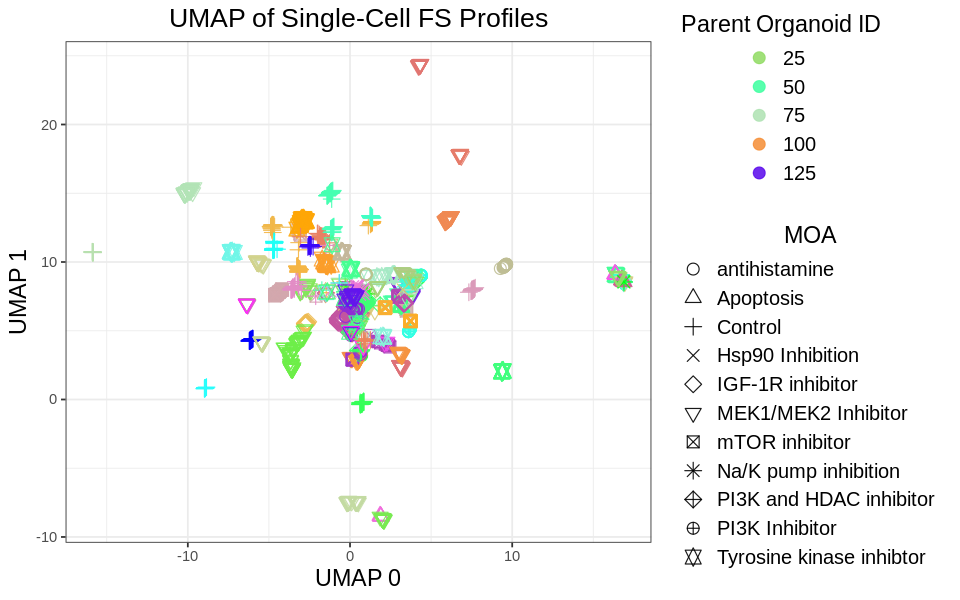

In [10]:
umap_sc_plot <- (
    ggplot(umap_sc_results, aes(x = UMAP1, y = UMAP2, color = parent_organoid_label, shape = MOA))
    + geom_point(size = 3, alpha = 0.9)
    # add  custom color scale
    + scale_color_gradientn(colors = c("magenta", "green", "cyan", "orange", "blue"))
    + scale_shape_manual(values = c(
        1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
        ))  # different shapes for each MOA
    + labs(title = "UMAP of Single-Cell FS Profiles", x = "UMAP 0", y = "UMAP 1")
    + theme_bw()
    + theme(
        plot.title = element_text(hjust = 0.5, size = 16),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        legend.title = element_text(size = 14, hjust = 0.5),
        legend.text = element_text(size = 12)
    )
    + guides(
        shape = guide_legend(
            title = "MOA",
            text = element_text(size = 16, hjust = 0.5)
            ),
        color = guide_legend(
            title = "Parent Organoid ID",
            text = element_text(size = 16, hjust = 0.5)
        )
    )
)
ggsave(umap_sc_plot, file = single_cell_features_annotated_path, width = width, height = height, dpi = 300)

umap_sc_plot
